## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_145778_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (59649, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts  er   pac         lng  \
0      GCBZT02500A240118070  2024-06-24 12:10:00 NaN  2.04  114.239586   
1                       NaN                  NaN NaN   NaN         NaN   
2                       NaN                  NaN NaN   NaN         NaN   
3                       NaN                  NaN NaN   NaN         NaN   
4                       NaN                  NaN NaN   NaN         NaN   
...                     ...                  ...  ..   ...         ...   
59644  GCBZT02500A240118070  2025-05-10 19:00:00 NaN  0.07  114.239586   
59645  GCBZT02500A240118070  2025-05-10 19:05:00 NaN  0.02  114.239586   
59646  GCBZT02500A240118070  2025-05-10 19:10:00 NaN  0.00  114.239586   
59647  GCBZT02500A240118070  2025-05-10 19:15:00 NaN  0.00  114.239586   
59648  GCBZT02500A240118070  2025-05-10 19:20:00 NaN  0.00  114.239586   

             lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      30.219706     斜屋顶双坡   15.0             NaN                   NaN  ...   
1            NaN       NaN    NaN         26.4988               80.9403  ...   
2            NaN       NaN    NaN         26.3404               80.0963  ...   
3            NaN       NaN    NaN         26.1748               79.0401  ...   
4            NaN       NaN    NaN         26.1028               78.3972  ...   
...          ...       ...    ...             ...                   ...  ...   
59644  30.219706     斜屋顶双坡   15.0         17.9331               65.9327  ...   
59645  30.219706     斜屋顶双坡   15.0             NaN                   NaN  ...   
59646  30.219706     斜屋顶双坡   15.0             NaN                   NaN  ...   
59647  30.219706     斜屋顶双坡   15.0         17.6393               68.0414  ...   
59648  30.219706     斜屋顶双坡   15.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                           NaN                NaN             NaN   
1                       11.8811           154.2407          3.3546   
2                        9.3762           156.8715          3.3443   
3                        6.6697           160.2330          3.2581   
4                        4.9295           163.5459          3.2011   
...                         ...                ...             ...   
59644                    0.0000             3.2562          1.8114   
59645                       NaN                NaN             NaN   
59646                       NaN                NaN             NaN   
59647                    0.0000             1.0854          1.8438   
59648                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN              NaN                 NaN   
1              4.3104           4.5274            207.3355   
2              4.3776           4.6148            211.5760   
3              4.3396           4.5902            214.1450   
4              4.3064           4.5636            215.3214   
...               ...              ...                 ...   
59644          3.8765           4.4971            227.4934   
59645             NaN              NaN                 NaN   
59646             NaN              NaN                 NaN   
59647          3.9840           4.6301            224.2072   
59648             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                     NaN                  NaN                  NaN   
1                206.4096             206.0341  2024-06-24 12:15:00   
2                210.5087             210.0860  2024-06-24 12:30:00   
3                212.9067             212.4243  2024-06-24 12:45:00   
4                213.8494             213.2777  2024-06-24 13:00:00   
...                   ...                  ...                  ...   
59644            233.5576             234.8832  2025-05-10 19:00:00   
59645                

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                    sn                   ts  er  \
0     2024-06-24 12:10:00  GCBZT02500A240118070  2024-06-24 12:10:00 NaN   
1     2024-06-24 12:15:00                   NaN                  NaN NaN   
2     2024-06-24 12:20:00                   NaN                  NaN NaN   
3     2024-06-24 12:25:00                   NaN                  NaN NaN   
4     2024-06-24 12:30:00                   NaN                  NaN NaN   
...                   ...                   ...                  ...  ..   
92242 2025-05-10 19:00:00  GCBZT02500A240118070  2025-05-10 19:00:00 NaN   
92243 2025-05-10 19:05:00  GCBZT02500A240118070  2025-05-10 19:05:00 NaN   
92244 2025-05-10 19:10:00  GCBZT02500A240118070  2025-05-10 19:10:00 NaN   
92245 2025-05-10 19:15:00  GCBZT02500A240118070  2025-05-10 19:15:00 NaN   
92246 2025-05-10 19:20:00  GCBZT02500A240118070  2025-05-10 19:20:00 NaN   

        pac         lng        lat roof_type  angle  temperature_2m  ...  \
0      2.04  114.239586  30.219706     斜屋顶双坡   15.0             NaN  ...   
1       NaN         NaN        NaN       NaN    NaN         26.4988  ...   
2       NaN         NaN        NaN       NaN    NaN             NaN  ...   
3       NaN         NaN        NaN       NaN    NaN             NaN  ...   
4       NaN         NaN        NaN       NaN    NaN         26.3404  ...   
...     ...         ...        ...       ...    ...             ...  ...   
92242  0.07  114.239586  30.219706     斜屋顶双坡   15.0         17.9331  ...   
92243  0.02  114.239586  30.219706     斜屋顶双坡   15.0             NaN  ...   
92244  0.00  114.239586  30.219706     斜屋顶双坡   15.0             NaN  ...   
92245  0.00  114.239586  30.219706     斜屋顶双坡   15.0         17.6393  ...   
92246  0.00  114.239586  30.219706     斜屋顶双坡   15.0             NaN  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                   NaN                       NaN                NaN   
1               11.7410                   11.8811           154.2407   
2                   NaN                       NaN                NaN   
3                   NaN                       NaN                NaN   
4                9.2564                    9.3762           156.8715   
...                 ...                       ...                ...   
92242            0.0000                    0.0000             3.2562   
92243               NaN                       NaN                NaN   
92244               NaN                       NaN                NaN   
92245            0.0000                    0.0000             1.0854   
92246               NaN                       NaN                NaN   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN             NaN              NaN                 NaN   
1              3.3546          4.3104           4.5274            207.3355   
2                 NaN             NaN              NaN                 NaN   
3                 NaN             NaN              NaN                 NaN   
4              3.3443          4.3776           4.6148            211.5760   
...               ...             ...              ...                 ...   
92242          1.8114          3.8765           4.4971            227.4934   
92243             NaN             NaN              NaN                 NaN   
92244             NaN             NaN              NaN                 NaN   
92245          1.8438          3.9840           4.6301            224.2072   
92246             NaN             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  
0                     NaN                  NaN                  NaN  
1                206.4096             206.0341  2024-06-24 12:15:00  
2                     NaN                  NaN                  NaN  
3                     NaN                  NaN                  NaN  
4                210.5087             

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
        ...
        92073, 92074, 92075, 92076, 92077, 92078, 92079, 92080, 92081, 92082],
       dtype='int64', length=48909),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
        ...
        92073, 92074, 92075, 92076, 92077, 92078, 92079, 92080, 92081, 92082],
       dtype='int64', length=48909),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(RangeIndex(start=0, stop=92247, step=1), True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
        ...
        92073, 92074, 92075, 92076, 92077, 92078, 92079, 92080, 92081, 92082],
       dtype='int64', length=48909),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
        ...
        92073, 92074, 92075, 92076, 92077, 92078, 92079, 92080, 92081, 92082],
       dtype='int64', length=48909),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([    0,     2,     3,     5,     6,     8,     9,    11,    12,    14,
        ...
        92232, 92234, 92235, 92237, 92238, 92240, 92241, 92243, 92244, 92246],
       dtype='int64', length=61498),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                    sn                   ts   er  \
0     2024-06-24 12:10:00  GCBZT02500A240118070  2024-06-24 12:10:00  0.0   
1     2024-06-24 12:15:00  GCBZT02500A240118070  2024-06-24 12:15:00  0.0   
2     2024-06-24 12:20:00  GCBZT02500A240118070  2024-06-24 12:20:00  0.0   
3     2024-06-24 12:25:00  GCBZT02500A240118070  2024-06-24 12:25:00  0.0   
4     2024-06-24 12:30:00  GCBZT02500A240118070  2024-06-24 12:30:00  0.0   
...                   ...                   ...                  ...  ...   
92242 2025-05-10 19:00:00  GCBZT02500A240118070  2025-05-10 19:00:00  0.0   
92243 2025-05-10 19:05:00  GCBZT02500A240118070  2025-05-10 19:05:00  0.0   
92244 2025-05-10 19:10:00  GCBZT02500A240118070  2025-05-10 19:10:00  0.0   
92245 2025-05-10 19:15:00  GCBZT02500A240118070  2025-05-10 19:15:00  0.0   
92246 2025-05-10 19:20:00  GCBZT02500A240118070  2025-05-10 19:20:00  0.0   

        pac         lng        lat roof_type  angle  temperature_2m  ...  \
0      2.04  114.239586  30.219706     斜屋顶双坡   15.0             NaN  ...   
1      0.00  114.239586  30.219706     斜屋顶双坡   15.0       26.498800  ...   
2      0.00  114.239586  30.219706     斜屋顶双坡   15.0       26.446000  ...   
3      0.00  114.239586  30.219706     斜屋顶双坡   15.0       26.393200  ...   
4      0.00  114.239586  30.219706     斜屋顶双坡   15.0       26.340400  ...   
...     ...         ...        ...       ...    ...             ...  ...   
92242  0.07  114.239586  30.219706     斜屋顶双坡   15.0       17.933100  ...   
92243  0.02  114.239586  30.219706     斜屋顶双坡   15.0       17.835167  ...   
92244  0.00  114.239586  30.219706     斜屋顶双坡   15.0       17.737233  ...   
92245  0.00  114.239586  30.219706     斜屋顶双坡   15.0       17.639300  ...   
92246  0.00  114.239586  30.219706     斜屋顶双坡   15.0       17.639300  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                   NaN                       NaN                NaN   
1               11.7410                 11.881100         154.240700   
2               10.9128                 11.046133         155.117633   
3               10.0846                 10.211167         155.994567   
4                9.2564                  9.376200         156.871500   
...                 ...                       ...                ...   
92242            0.0000                  0.000000           3.256200   
92243            0.0000                  0.000000           2.532600   
92244            0.0000                  0.000000           1.809000   
92245            0.0000                  0.000000           1.085400   
92246            0.0000                  0.000000           1.085400   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN             NaN              NaN                 NaN   
1            3.354600        4.310400         4.527400            207.3355   
2            3.351167        4.332800         4.556533            208.7490   
3            3.347733        4.355200         4.585667            210.1625   
4            3.344300        4.377600         4.614800            211.5760   
...               ...             ...              ...                 ...   
92242        1.811400        3.876500         4.497100            227.4934   
92243        1.822200        3.912333         4.541433            226.3980   
92244        1.833000        3.948167         4.585767            225.3026   
92245        1.843800        3.984000         4.630100            224.2072   
92246        1.843800        3.984000         4.630100            224.2072   

       wind_direction_80m  wind_direction_120m        variable_date  
0                     NaN                  NaN                  NaN  
1              206.409600           206.034100  2024-06-24 12:15:00  
2              207.775967           207.384733                  NaN  
3              209.142333           208.735367                  NaN  
4              210.508700 

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([0], dtype='int64'), True)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=92247, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                    sn  \
ts                                                              
2024-06-24 12:10:00 2024-06-24 12:10:00  GCBZT02500A240118070   
2024-06-24 12:15:00 2024-06-24 12:15:00  GCBZT02500A240118070   
2024-06-24 12:20:00 2024-06-24 12:20:00  GCBZT02500A240118070   
2024-06-24 12:25:00 2024-06-24 12:25:00  GCBZT02500A240118070   
2024-06-24 12:30:00 2024-06-24 12:30:00  GCBZT02500A240118070   
...                                 ...                   ...   
2025-05-10 19:00:00 2025-05-10 19:00:00  GCBZT02500A240118070   
2025-05-10 19:05:00 2025-05-10 19:05:00  GCBZT02500A240118070   
2025-05-10 19:10:00 2025-05-10 19:10:00  GCBZT02500A240118070   
2025-05-10 19:15:00 2025-05-10 19:15:00  GCBZT02500A240118070   
2025-05-10 19:20:00 2025-05-10 19:20:00  GCBZT02500A240118070   

                                     ts   er   pac         lng        lat  \
ts                                                                          
2024-06-24 12:10:00 2024-06-24 12:10:00  0.0  2.04  114.239586  30.219706   
2024-06-24 12:15:00 2024-06-24 12:15:00  0.0  0.00  114.239586  30.219706   
2024-06-24 12:20:00 2024-06-24 12:20:00  0.0  0.00  114.239586  30.219706   
2024-06-24 12:25:00 2024-06-24 12:25:00  0.0  0.00  114.239586  30.219706   
2024-06-24 12:30:00 2024-06-24 12:30:00  0.0  0.00  114.239586  30.219706   
...                                 ...  ...   ...         ...        ...   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.07  114.239586  30.219706   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.02  114.239586  30.219706   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  114.239586  30.219706   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  114.239586  30.219706   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  114.239586  30.219706   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-06-24 12:10:00     斜屋顶双坡   15.0             NaN  ...               NaN   
2024-06-24 12:15:00     斜屋顶双坡   15.0       26.498800  ...           11.7410   
2024-06-24 12:20:00     斜屋顶双坡   15.0       26.446000  ...           10.9128   
2024-06-24 12:25:00     斜屋顶双坡   15.0       26.393200  ...           10.0846   
2024-06-24 12:30:00     斜屋顶双坡   15.0       26.340400  ...            9.2564   
...                       ...    ...             ...  ...               ...   
2025-05-10 19:00:00     斜屋顶双坡   15.0       17.933100  ...            0.0000   
2025-05-10 19:05:00     斜屋顶双坡   15.0       17.835167  ...            0.0000   
2025-05-10 19:10:00     斜屋顶双坡   15.0       17.737233  ...            0.0000   
2025-05-10 19:15:00     斜屋顶双坡   15.0       17.639300  ...            0.0000   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.639300  ...            0.0000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-06-24 12:10:00                       NaN                NaN   
2024-06-24 12:15:00                 11.881100         154.240700   
2024-06-24 12:20:00                 11.046133         155.117633   
2024-06-24 12:25:00                 10.211167         155.994567   
2024-06-24 12:30:00                  9.376200         156.871500   
...                                       ...                ...   
2025-05-10 19:00:00                  0.000000           3.256200   
2025-05-10 19:05:00                  0.000000           2.532600   
2025-05-10 19:10:00                  0.000000           1.809000   
2025-05-10 19:15:00                  0.000000           1.085400   
2025-05-10 19:20:00                  0.000000           1.085400   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-06-24 12:10:00             NaN             NaN              NaN   
2024-06-24 12:15:00        3.354600        4.310400  

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                    sn  \
2024-06-24 12:10:00 2024-06-24 12:10:00  GCBZT02500A240118070   
2024-06-24 12:15:00 2024-06-24 12:15:00  GCBZT02500A240118070   
2024-06-24 12:20:00 2024-06-24 12:20:00  GCBZT02500A240118070   
2024-06-24 12:25:00 2024-06-24 12:25:00  GCBZT02500A240118070   
2024-06-24 12:30:00 2024-06-24 12:30:00  GCBZT02500A240118070   
...                                 ...                   ...   
2025-05-10 19:00:00 2025-05-10 19:00:00  GCBZT02500A240118070   
2025-05-10 19:05:00 2025-05-10 19:05:00  GCBZT02500A240118070   
2025-05-10 19:10:00 2025-05-10 19:10:00  GCBZT02500A240118070   
2025-05-10 19:15:00 2025-05-10 19:15:00  GCBZT02500A240118070   
2025-05-10 19:20:00 2025-05-10 19:20:00  GCBZT02500A240118070   

                                     ts   er   pac         lng        lat  \
2024-06-24 12:10:00 2024-06-24 12:10:00  0.0  2.04  114.239586  30.219706   
2024-06-24 12:15:00 2024-06-24 12:15:00  0.0  0.00  114.239586  30.219706   
2024-06-24 12:20:00 2024-06-24 12:20:00  0.0  0.00  114.239586  30.219706   
2024-06-24 12:25:00 2024-06-24 12:25:00  0.0  0.00  114.239586  30.219706   
2024-06-24 12:30:00 2024-06-24 12:30:00  0.0  0.00  114.239586  30.219706   
...                                 ...  ...   ...         ...        ...   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.07  114.239586  30.219706   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.02  114.239586  30.219706   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  114.239586  30.219706   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  114.239586  30.219706   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  114.239586  30.219706   

                    roof_type  angle  temperature_2m  ...  \
2024-06-24 12:10:00     斜屋顶双坡   15.0             NaN  ...   
2024-06-24 12:15:00     斜屋顶双坡   15.0       26.498800  ...   
2024-06-24 12:20:00     斜屋顶双坡   15.0       26.446000  ...   
2024-06-24 12:25:00     斜屋顶双坡   15.0       26.393200  ...   
2024-06-24 12:30:00     斜屋顶双坡   15.0       26.340400  ...   
...                       ...    ...             ...  ...   
2025-05-10 19:00:00     斜屋顶双坡   15.0       17.933100  ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       17.835167  ...   
2025-05-10 19:10:00     斜屋顶双坡   15.0       17.737233  ...   
2025-05-10 19:15:00     斜屋顶双坡   15.0       17.639300  ...   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.639300  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-06-24 12:10:00                       NaN                NaN   
2024-06-24 12:15:00                 11.881100         154.240700   
2024-06-24 12:20:00                 11.046133         155.117633   
2024-06-24 12:25:00                 10.211167         155.994567   
2024-06-24 12:30:00                  9.376200         156.871500   
...                                       ...                ...   
2025-05-10 19:00:00                  0.000000           3.256200   
2025-05-10 19:05:00                  0.000000           2.532600   
2025-05-10 19:10:00                  0.000000           1.809000   
2025-05-10 19:15:00                  0.000000           1.085400   
2025-05-10 19:20:00                  0.000000           1.085400   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-06-24 12:10:00             NaN             NaN              NaN   
2024-06-24 12:15:00        3.354600        4.310400         4.527400   
2024-06-24 12:20:00        3.351167        4.332800         4.556533   
2024-06-24 12:25:00        3.347733        4.355200         4.585667   
2024-06-24 12:30:00        3.344300        4.377600         4.614800   
...                             ...             ...              ...   
2025-05-10 19:00:00        1.811400        3.876500         4.497100   
2025-05-10 19:05:00        1.822200        3.912333         4.541433   
2025-05-10 19:10:00        1.833000        3.948167         4.585767   
2025-05-10 19:15:00        1.843800        3.984000   

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex(['2024-06-24 12:10:00'], dtype='datetime64[ns]', freq=None),
 True)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(92247, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    18.084466
1        relative_humidity_2m    70.039235
2                dew_point_2m    12.032164
3                pressure_msl  1016.275010
4            surface_pressure  1013.891790
5   precipitation_probability    10.619666
6                 cloud_cover    56.338737
7             cloud_cover_low    13.582623
8             cloud_cover_mid    30.320822
9            cloud_cover_high    34.555486
10        shortwave_radiation   161.758934
11           direct_radiation    94.080897
12   direct_normal_irradiance   148.928567
13          diffuse_radiation    67.678038
14             wind_speed_10m     2.537981
15             wind_speed_80m     4.196257
16            wind_speed_120m     4.662961
17         wind_direction_10m   141.485955
18         wind_direction_80m   140.536754
19        wind_direction_120m   140.157172
20                   pac_copy     2.105884

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m     99.630832
1        relative_humidity_2m    340.971662
2                dew_point_2m    101.137636
3                pressure_msl    107.067372
4            surface_pressure    105.094915
5   precipitation_probability    800.503367
6                 cloud_cover   1807.579061
7             cloud_cover_low    836.535526
8             cloud_cover_mid   1607.414054
9            cloud_cover_high   1713.768085
10        shortwave_radiation  55344.440878
11           direct_radiation  27976.814319
12   direct_normal_irradiance  52821.211508
13          diffuse_radiation   7564.033116
14             wind_speed_10m      2.094274
15             wind_speed_80m      4.397448
16            wind_speed_120m      5.321133
17         wind_direction_10m  10020.714219
18         wind_direction_80m   9781.773552
19        wind_direction_120m   9741.346179
20                   pac_copy     12.161898

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            9.981525
1        relative_humidity_2m           18.465418
2                dew_point_2m           10.056721
3                pressure_msl           10.347336
4            surface_pressure           10.251581
5   precipitation_probability           28.293168
6                 cloud_cover           42.515633
7             cloud_cover_low           28.922924
8             cloud_cover_mid           40.092569
9            cloud_cover_high           41.397682
10        shortwave_radiation          235.253992
11           direct_radiation          167.262710
12   direct_normal_irradiance          229.828657
13          diffuse_radiation           86.971450
14             wind_speed_10m            1.447161
15             wind_speed_80m            2.097009
16            wind_speed_120m            2.306758
17         wind_direction_10m          100.103518
18         wind_direction_80m           98.902849
19        wind_direction_120m           98.698258
20                   pac_copy            3.487391

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    38.9115
1        relative_humidity_2m    99.9663
2                dew_point_2m    28.6431
3                pressure_msl  1040.8010
4            surface_pressure  1038.2378
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   898.2227
11           direct_radiation   737.8847
12   direct_normal_irradiance   790.8193
13          diffuse_radiation   389.6253
14             wind_speed_10m    10.1884
15             wind_speed_80m    15.4503
16            wind_speed_120m    16.7571
17         wind_direction_10m   358.7980
18         wind_direction_80m   358.3558
19        wind_direction_120m   358.6706
20                   pac_copy    17.2600

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m    -3.6616
1        relative_humidity_2m    16.3251
2                dew_point_2m   -16.4445
3                pressure_msl   991.3342
4            surface_pressure   989.1324
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.0758
15             wind_speed_80m     0.1554
16            wind_speed_120m     0.1294
17         wind_direction_10m     2.0735
18         wind_direction_80m     1.4838
19        wind_direction_120m     2.0312
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    18.294417
1        relative_humidity_2m    71.948233
2                dew_point_2m    12.551533
3                pressure_msl  1017.188850
4            surface_pressure  1014.793450
5   precipitation_probability     0.000000
6                 cloud_cover    70.201733
7             cloud_cover_low     0.006300
8             cloud_cover_mid     4.911217
9            cloud_cover_high     5.993450
10        shortwave_radiation    13.122083
11           direct_radiation     0.655567
12   direct_normal_irradiance     3.076000
13          diffuse_radiation    10.358400
14             wind_speed_10m     2.197700
15             wind_speed_80m     3.965500
16            wind_speed_120m     4.438667
17         wind_direction_10m   113.208533
18         wind_direction_80m   113.721633
19        wind_direction_120m   113.806033
20                   pac_copy     0.000000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333       12.020700             62.042233      6.103200   1009.985044   
0.666667       23.842489             81.033156     17.615189   1022.547067   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1007.681133                        0.0    18.466311   
0.666667       1020.093111                        0.0    98.063878   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333           0.0000         0.013500          0.002400  ...   
0.666667           2.4907        28.982433         53.735533  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                  0.000000           0.000000   
0.666667         33.378767                 97.735878          96.304644   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333          1.7767        3.070467         3.412833           76.797544   
0.666667          2.8362        4.905800         5.523378          192.521467   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333           76.825789            76.619089      0.00  
0.666667          192.872089           193.002600      1.27  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000             -0.141250      0.896542   
relative_humidity_2m            -0.141250              1.000000      0.305586   
dew_point_2m                     0.896542              0.305586      1.000000   
pressure_msl                    -0.878334             -0.115292     -0.892500   
surface_pressure                -0.876506             -0.117207     -0.891586   
precipitation_probability        0.016478              0.285079      0.136081   
cloud_cover                     -0.011490              0.116494      0.043039   
cloud_cover_low                 -0.143791              0.308753     -0.009471   
cloud_cover_mid                 -0.250242              0.082302     -0.196428   
cloud_cover_high                 0.247659              0.050806      0.259077   
shortwave_radiation              0.367698             -0.488933      0.127687   
direct_radiation                 0.353885             -0.471936      0.119838   
direct_normal_irradiance         0.300911             -0.504068      0.052743   
diffuse_radiation                0.314020             -0.414919      0.114917   
wind_speed_10m                   0.267646             -0.241519      0.153985   
wind_speed_80m                   0.142740             -0.092348      0.105379   
wind_speed_120m                  0.109525             -0.056530      0.090261   
wind_direction_10m               0.067643              0.076037      0.089131   
wind_direction_80m               0.076518              0.061680      0.092244   
wind_direction_120m              0.083628              0.057990      0.097431   
pac_copy                         0.327891             -0.549633      0.057768   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.878334         -0.876506   
relative_humidity_2m          -0.115292         -0.117207   
dew_point_2m                  -0.892500         -0.891586   
pressure_msl                   1.000000          0.999993   
surface_pressure               0.999993          1.000000   
precipitation_probability     -0.120839         -0.121534   
cloud_cover                   -0.042627         -0.042974   
cloud_cover_low                0.078829          0.078267   
cloud_cover_mid                0.201361          0.200833   
cloud_cover_high              -0.292105         -0.292155   
shortwave_radiation           -0.137000         -0.135073   
direct_radiation              -0.131595         -0.129751   
direct_normal_irradiance      -0.075245         -0.073419   
diffuse_radiation             -0.117498         -0.115830   
wind_speed_10m                -0.179470         -0.178595   
wind_speed_80m                -0.141362         -0.141214   
wind_speed_120m               -0.128119         -0.128143   
wind_direction_10m            -0.124790         -0.125134   
wind_direction_80m            -0.140841         -0.141224   
wind_direction_120m           -0.147929         -0.148305   
pac_copy                      -0.088990         -0.087035   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.016478    -0.011490   
relative_humidity_2m                        0.285079     0.116494   
dew_point_2m                                0.136081     0.043039   
pressure_msl                               -0.120839    -0.042627   
surface_pressure                           -0.121534    -0.042974   
precipitation_probability                   1.000000     0.315872   
cloud_cover                                 0.315872     1.000000   
cloud_cover_low                             0.374825     0.377296   
cloud_cover_mid                             0.413515     0.630620   
cloud_cover_high                            0.198383     0.658462   
shortwave_radiation                        -0.074155    -0.140205   
direct_radiation                           -0.112439    -0.250535   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.869294
1        relative_humidity_2m          0.055027
2                dew_point_2m          0.968789
3                pressure_msl          0.972061
4            surface_pressure          0.971973
5   precipitation_probability          0.402861
6                 cloud_cover          0.533308
7             cloud_cover_low          0.534686
8             cloud_cover_mid          0.586528
9            cloud_cover_high          0.519902
10        shortwave_radiation         -0.334465
11           direct_radiation         -0.234559
12   direct_normal_irradiance         -0.213401
13          diffuse_radiation         -0.382635
14             wind_speed_10m          0.554252
15             wind_speed_80m          0.572268
16            wind_speed_120m          0.537427
17         wind_direction_10m          0.402133
18         wind_direction_80m          0.425111
19        wind_direction_120m          0.432302
20                   pac_copy         -0.271416

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([ 51344.31047647, 135011.9897162 ,  59805.42907302]),
 'fft_periods': array([289, 288, 143])}

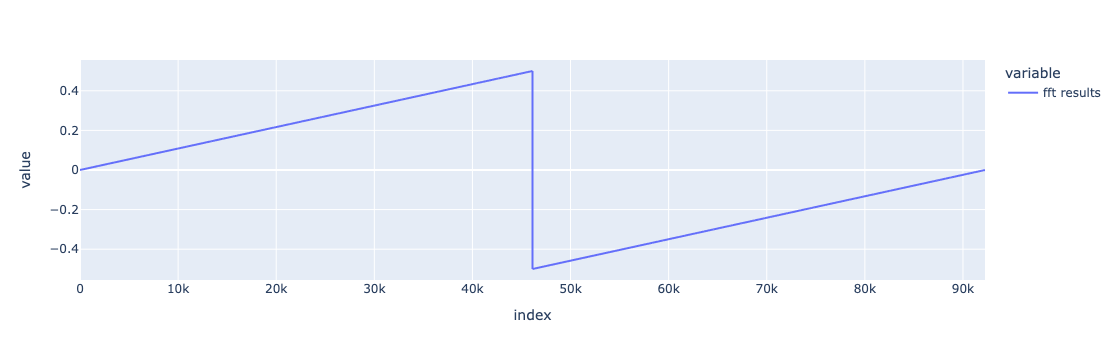

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -35.33941731274162,
  'P-value': 0.0,
  'Lags': np.int64(57),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -35.339
  P-value                         0.000
  Lags                               57
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-40.59806973811176),
  'P-value': 0.0,
  'Lags': 67,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -40.598
  P-value                         0.000
  Lags                               67
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -35.32755465909488,
  'P-value': 0.0,
  'Lags': np.int64(57),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -35.328
  P-value                         0.000
  Lags                               57
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}